Let's start by visualising some data points where input features are pre-labelled with our target class for predicting the class of new data.

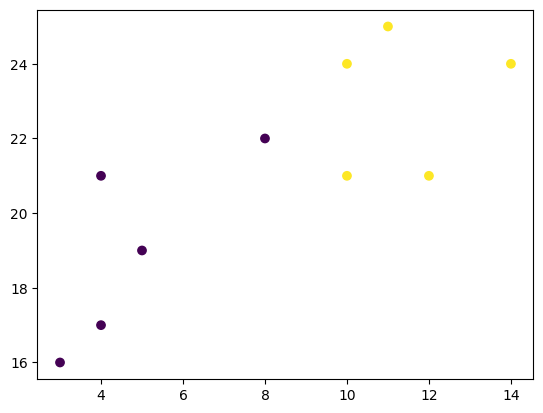

In [3]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

At first, we are turning the input features into a set of points. Then, we are fitting the KNN algorithm with K = 1.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

data = list(zip(x, y))
print(data)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(data, classes)

[(4, 21), (5, 19), (10, 24), (4, 17), (3, 16), (11, 25), (14, 24), (8, 22), (10, 21), (12, 21)]


KNeighborsClassifier(n_neighbors=1)

Let's classify a new data point using the KNN algorithm:

In [7]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)
print(prediction)

[0]


Now, we are plotting all the data along with the new point and class, it's been labelled blue with the 0 class.

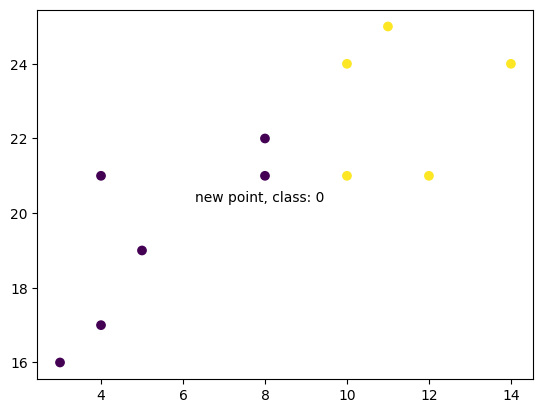

In [8]:
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Let's implement the same thing with a higher value of K = 5.

In [9]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(data, classes)
prediction = knn.predict(new_point)
print(prediction)

[1]


As we are getting the output as 1, we can note that the colour has also changed based on the associated class label.

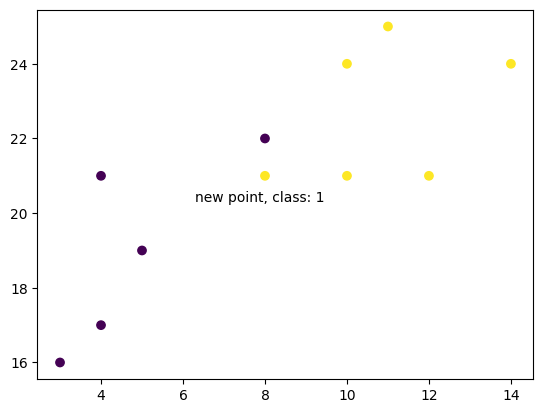

In [10]:
plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Let's apply the KNN classifier to a dataset. At first, we are importing the necessary python packages. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's download the iris dataset from its weblink as follows:

In [4]:
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

Now, assign the column names to the dataset as follows:

In [5]:
headernames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

Next, we have to read the dataset using the Pandas data frame as follows:

In [14]:
data = pd.read_csv(path, names=headernames)
data.shape

(150, 5)

In [13]:
data.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let's implement the very basic step of data preprocessing. 

In [16]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 4].values

Here, we are dividing the data into train and test splits, with 70% of the training data and 30% of the testing data.

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

Let's do the data scaling. 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now, we are training the model with the help of the KNeighborsClassifier class of sklearn as follows:

In [20]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

Now, we have to make the prediction, which can be done in the following way:

In [21]:
y_pred = classifier.predict(X_test)

Let's print the results as follows:

In [22]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 16  1]
 [ 0  2 15]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.89      0.94      0.91        17
 Iris-virginica       0.94      0.88      0.91        17

       accuracy                           0.93        45
      macro avg       0.94      0.94      0.94        45
   weighted avg       0.93      0.93      0.93        45

Accuracy: 0.9333333333333333


Let's check the accuracy for K = 9.

In [29]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=9)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [30]:
y_pred = classifier.predict(X_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 15  2]
 [ 0  2 15]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      0.88      0.88        17
 Iris-virginica       0.88      0.88      0.88        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.91      0.91      0.91        45

Accuracy: 0.9111111111111111


Let's check the accuracy for K = 7.

In [32]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [33]:
y_pred = classifier.predict(X_test)

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[11  0  0]
 [ 0 15  2]
 [ 0  2 15]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.88      0.88      0.88        17
 Iris-virginica       0.88      0.88      0.88        17

       accuracy                           0.91        45
      macro avg       0.92      0.92      0.92        45
   weighted avg       0.91      0.91      0.91        45

Accuracy: 0.9111111111111111


For K = 7 and K = 9, we get accuracies of 91.11% for both cases. The best accuracy has been achieved with K = 8, which is 93.33%.